### Price of cars

[Data](http://bit.ly/1gIQs6C) of characteristics of  Honda Accord

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('http://bit.ly/1gIQs6C')

In [3]:
df.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


mileage -predictor, and price - target feature

In [4]:
y = df.price.values
X = df.mileage.values.reshape(-1,1)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print('Model:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0]))

Model:
price = 16762.02 + (-0.05)*mileage


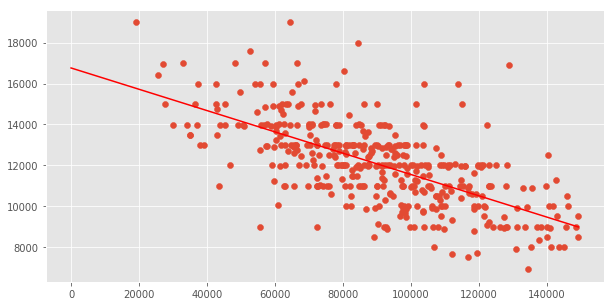

In [9]:
x = np.linspace(0, max(X), 100)
y_line = model.intercept_ + model.coef_[0]*x

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X, y)

ax.plot(x, y_line, c='red')



### Quality metrics

Residues

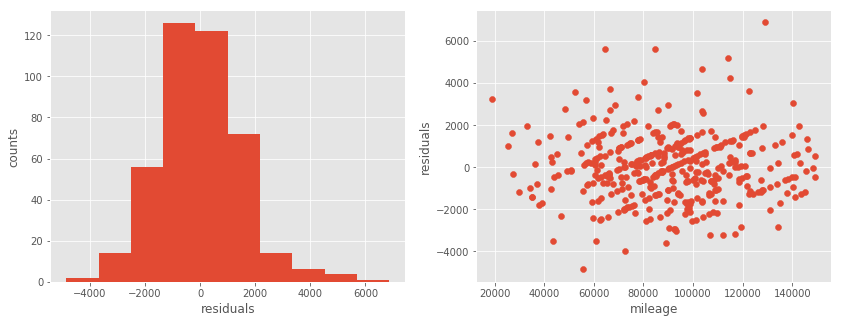

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

y_hat = model.predict(X)
res = y - y_hat
ax[0].hist(res)
ax[0].set_xlabel('residuals')
ax[0].set_ylabel('counts')

ax[1].scatter(X, res)
ax[1].set_xlabel('mileage')
ax[1].set_ylabel('residuals')


Normal distribution (Теорема Гаусса-Маркова).<br/>
Should be no relation between residuals and features.


In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Можно посчитать простые варианты агрегирования остатков, например:

* $\frac{1}{n} \sum_i |\hat{y}^{(i)}-y^{(i)}|$ - средняя абсолютная ошибка
* $\frac{1}{n} \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - средняя квадратичная ошибка

In [13]:
print('MAE %.2f' % mean_absolute_error(y, y_hat))
print('MSE %.2f' % mean_squared_error(y, y_hat))

MAE 1182.21
MSE 2412292.55


Determination $R^2$:

* $TSS = \sum_i (y^{(i)}-\bar{y})^2$ (total sum of squares)
* $RSS = \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ (residual sum of squares)
* $ESS = \sum_i (\hat{y}^{(i)}-\bar{y})^2$ (explained sum of squares)

$$TSS = ESS + RSS$$

$R^2=1-\frac{RSS}{TSS}$


In [14]:
print('R^2 %.2f:' % r2_score(y, y_hat))

R^2 0.43:


In [15]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

C:\Users\sanek\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     314.3
Date:                Tue, 25 Jul 2017   Prob (F-statistic):           9.22e-53
Time:                        08:03:40   Log-Likelihood:                -3655.8
No. Observations:                 417   AIC:                             7316.
Df Residuals:                     415   BIC:                             7324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.676e+04    274.646     61.031      0.0

## 2. Feature extraction

### Normalization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression(fit_intercept=True)
model.fit(X, y)


C:\Users\sanek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('Model:\nprice = %.2f + (%.2f)*mileage`' % (model.intercept_, model.coef_[0]))

Model:
price = 12084.24 + (-1351.67)*mileage`


In [17]:
from sklearn.feature_extraction import DictVectorizer
cols = df.columns[1:]

dv = DictVectorizer()
dv.fit(df[cols].T.to_dict().values())

X = dv.transform(df[cols].T.to_dict().values())

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)